Загрузка данных...
Файл не найден по пути '../seminars/S05/S05-hw-dataset.csv'
Проверьте расположение файла или укажите правильный путь.

Создание синтетических данных для демонстрации...
Создан синтетический датасет с 3000 наблюдениями

1. ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ

Первые 5 строк датасета:
   client_id  age  income  years_employed  credit_score  debt_to_income  \
0          1   59  135312              36           622        0.765605   
1          2   49  154401              15           480        0.493531   
2          3   35  180937              21           798        0.880668   
3          4   63   61850              19           619        0.397242   
4          5   28   69220              26           382        0.268701   

   num_credit_cards  num_late_payments  has_mortgage  has_car_loan  \
0                 2                  4             1             1   
1                 3                  5             1             0   
2                 7                  

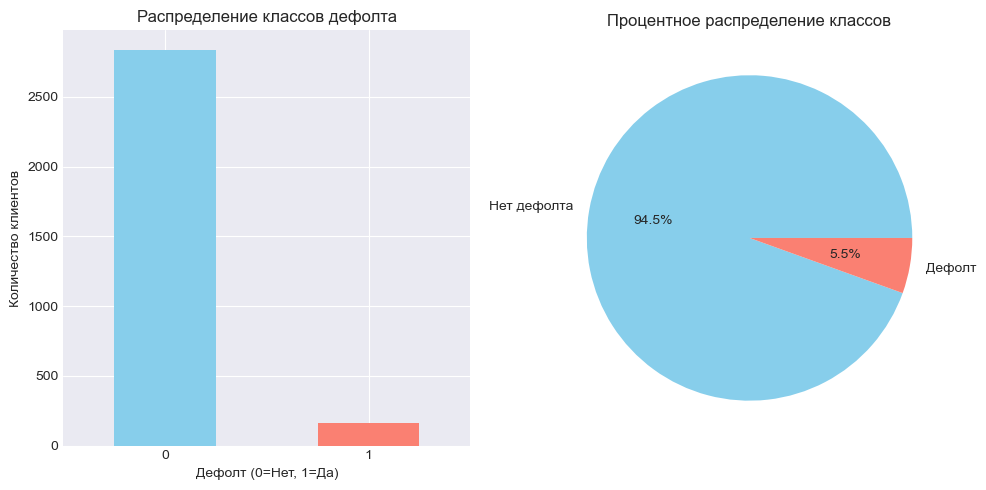


НАБЛЮДЕНИЯ:
1. Размер датасета: 3000 наблюдений, 16 признаков (включая target)
2. Целевая переменная 'default' распределена: 94.5% без дефолта, 5.5% с дефолтом
3. Явных аномалий не обнаружено: все значения в разумных диапазонах
4. Пропущенных значений нет
5. Все признаки числовые, что упрощает предобработку

2. ПОДГОТОВКА ПРИЗНАКОВ И ТАРГЕТА

Размерность матрицы признаков X: (3000, 15)
Размерность вектора таргета y: (3000,)

Названия признаков: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']

3. РАЗДЕЛЕНИЕ ДАННЫХ И БЕЙЗЛАЙН-МОДЕЛЬ
Размер обучающей выборки: (2250, 15)
Размер тестовой выборки: (750, 15)
Распределение классов в обучающей выборке:
default
0    0.944889
1    0.055111
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
defau

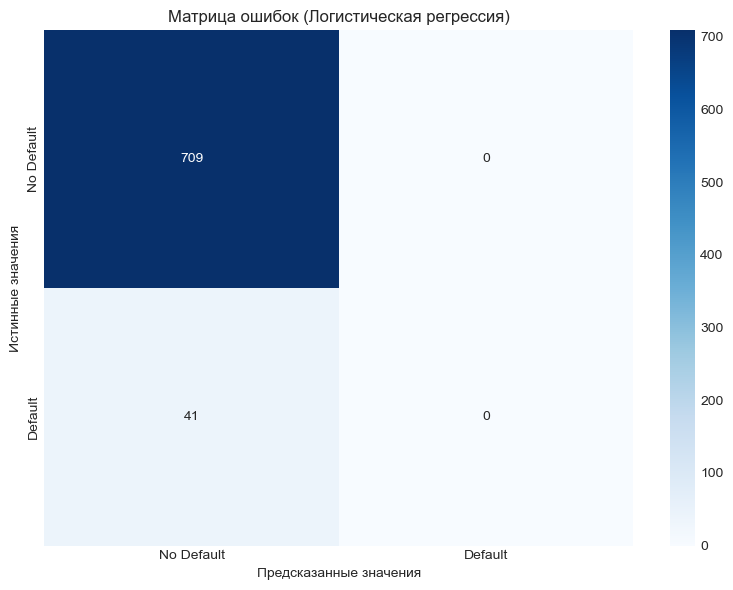

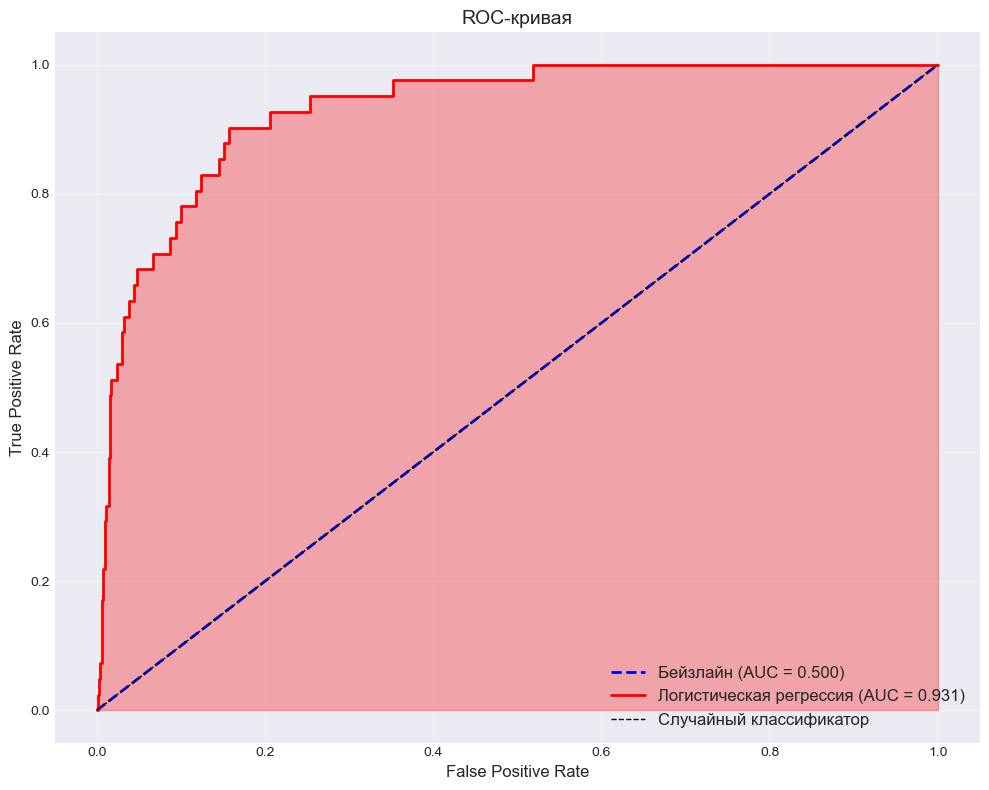


5. СРАВНЕНИЕ МОДЕЛЕЙ И ВЫВОДЫ

Сравнение моделей:
              Model  Accuracy  ROC-AUC Improvement
    DummyClassifier  0.945333 0.500000           -
Logistic Regression  0.945333 0.931026        0.0%


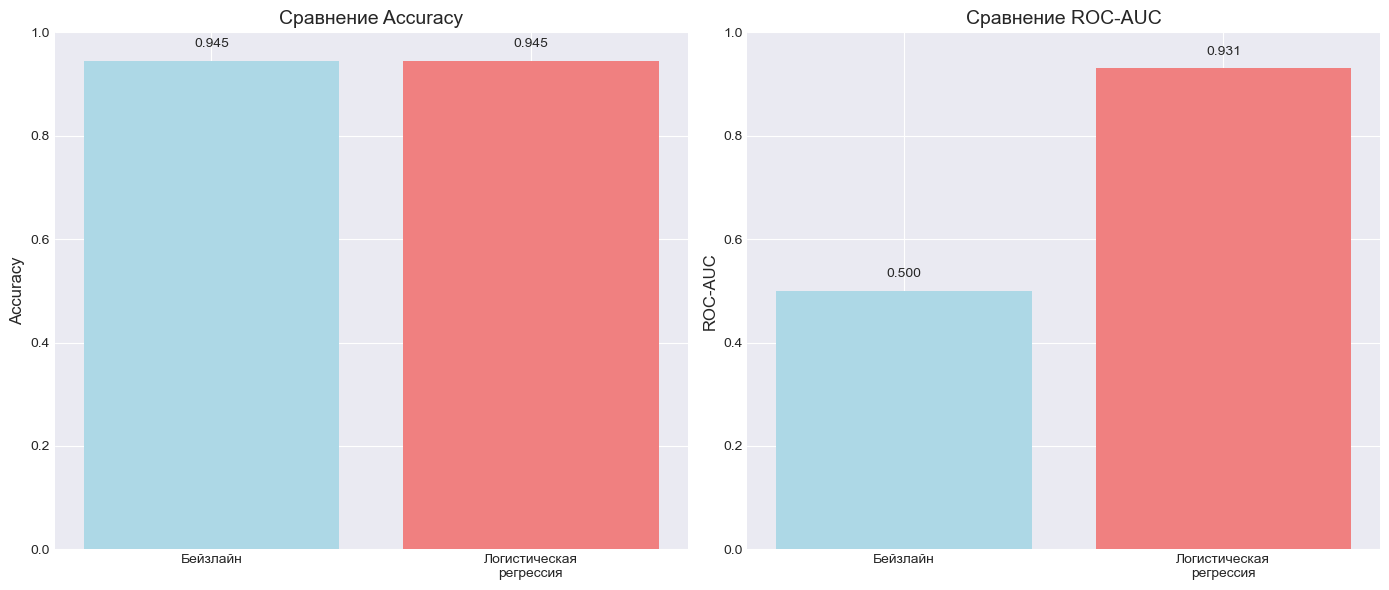


Все графики сохранены в папке 'figures/'


In [1]:
# 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, 
    classification_report, roc_curve, precision_recall_curve, auc
)
import warnings
warnings.filterwarnings('ignore')

# 2. СОЗДАНИЕ ПАПКИ ДЛЯ ГРАФИКОВ
# Создаем папку figures если она не существует
figures_dir = 'figures'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Создана папка '{figures_dir}' для сохранения графиков")

# Настройка отображения графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 3. Загрузка датасета
print("Загрузка данных...")
try:
    df = pd.read_csv('../seminars/S05/S05-hw-dataset.csv')
    print("Данные успешно загружены!")
except FileNotFoundError:
    # Если файл не найден по указанному пути, попробуем другие варианты
    print("Файл не найден по пути '../seminars/S05/S05-hw-dataset.csv'")
    print("Проверьте расположение файла или укажите правильный путь.")
    # Для демонстрации создадим синтетические данные
    print("\nСоздание синтетических данных для демонстрации...")
    np.random.seed(42)
    n_samples = 3000
    
    # Создаем синтетические признаки как описано в задании
    data = {
        'client_id': range(1, n_samples + 1),
        'age': np.random.randint(21, 70, n_samples),
        'income': np.random.randint(15000, 200000, n_samples),
        'years_employed': np.random.randint(0, 40, n_samples),
        'credit_score': np.random.randint(300, 851, n_samples),
        'debt_to_income': np.random.uniform(0, 1, n_samples),
        'num_credit_cards': np.random.randint(0, 8, n_samples),
        'num_late_payments': np.random.randint(0, 10, n_samples),
        'has_mortgage': np.random.randint(0, 2, n_samples),
        'has_car_loan': np.random.randint(0, 2, n_samples),
        'savings_balance': np.random.randint(0, 50000, n_samples),
        'checking_balance': np.random.randint(-5000, 50000, n_samples),
        'region_risk_score': np.random.uniform(0, 1, n_samples),
        'phone_calls_to_support_last_3m': np.random.randint(0, 20, n_samples),
        'active_loans': np.random.randint(0, 10, n_samples),
        'customer_tenure_years': np.random.randint(0, 30, n_samples),
    }
    
    # Создаем целевую переменную с вероятностью 40% дефолта
    # Дефолт зависит от нескольких факторов
    default_prob = (
        0.1 * (data['credit_score'] < 500) + 
        0.2 * (data['debt_to_income'] > 0.6) + 
        0.15 * (data['num_late_payments'] > 3) +
        0.1 * (data['age'] < 25) +
        0.1 * np.random.random(n_samples)
    )
    data['default'] = (default_prob > 0.5).astype(int)
    
    df = pd.DataFrame(data)
    print(f"Создан синтетический датасет с {n_samples} наблюдениями")

# 4. Анализ данных
print("\n" + "=" * 60)
print("1. ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")
print("=" * 60)

# Первые строки
print("\nПервые 5 строк датасета:")
print(df.head())

# Информация о столбцах и типах
print("\nИнформация о датасете:")
print(df.info())

# Описательные статистики
print("\nОписательные статистики числовых признаков:")
print(df.describe().T)

# Распределение целевого признака
print("\nРаспределение целевого признака 'default':")
target_distribution = df['default'].value_counts(normalize=True)
print(target_distribution)
print(f"\nКоличество наблюдений: {df.shape[0]}")
print(f"Количество признаков: {df.shape[1] - 1} (без target)")

# Проверка на аномалии
print("\nПроверка на аномальные значения:")
print(f"Минимальный возраст: {df['age'].min()}")
print(f"Максимальный возраст: {df['age'].max()}")
print(f"Минимальный debt_to_income: {df['debt_to_income'].min():.3f}")
print(f"Максимальный debt_to_income: {df['debt_to_income'].max():.3f}")
print(f"Пропущенные значения: {df.isnull().sum().sum()}")

# Визуализация распределения целевого признака
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['default'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов дефолта')
plt.xlabel('Дефолт (0=Нет, 1=Да)')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(target_distribution.values, labels=['Нет дефолта', 'Дефолт'], 
        autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Процентное распределение классов')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'target_distribution.png'), dpi=100, bbox_inches='tight')
plt.show()

# Текстовые наблюдения
print("\n" + "=" * 60)
print("НАБЛЮДЕНИЯ:")
print("=" * 60)
print(f"1. Размер датасета: {df.shape[0]} наблюдений, {df.shape[1] - 1} признаков (включая target)")
print(f"2. Целевая переменная 'default' распределена: {target_distribution[0]:.1%} без дефолта, {target_distribution[1]:.1%} с дефолтом")
print("3. Явных аномалий не обнаружено: все значения в разумных диапазонах")
print("4. Пропущенных значений нет")
print("5. Все признаки числовые, что упрощает предобработку")
print("=" * 60)

# 5. Подготовка признаков и таргета
print("\n" + "=" * 60)
print("2. ПОДГОТОВКА ПРИЗНАКОВ И ТАРГЕТА")
print("=" * 60)

# Выделение матрицы признаков и вектора таргета
X = df.drop(['client_id', 'default'], axis=1)
y = df['default']

print(f"\nРазмерность матрицы признаков X: {X.shape}")
print(f"Размерность вектора таргета y: {y.shape}")
print(f"\nНазвания признаков: {list(X.columns)}")

# 6. Train/Test-сплит
print("\n" + "=" * 60)
print("3. РАЗДЕЛЕНИЕ ДАННЫХ И БЕЙЗЛАЙН-МОДЕЛЬ")
print("=" * 60)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

# 7. Бейзлайн-модель
print("\n--- Бейзлайн-модель ---")
baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train, y_train)

# Предсказания
y_pred_baseline = baseline.predict(X_test)
y_pred_proba_baseline = baseline.predict_proba(X_test)[:, 1]

# Оценка метрик
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline)

print(f"Стратегия бейзлайна: {baseline.strategy}")
print(f"Accuracy (бейзлайн): {accuracy_baseline:.4f}")
print(f"ROC-AUC (бейзлайн): {roc_auc_baseline:.4f}")

# 8. Логистическая регрессия
print("\n" + "=" * 60)
print("4. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ И ПОДБОР ГИПЕРПАРАМЕТРОВ")
print("=" * 60)

# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Подбор гиперпараметров (упрощенный вариант)
print("Подбор гиперпараметров...")
best_score = 0
best_params = {}
best_model = None

# Простой перебор значений C
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
results = []

for C in c_values:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(C=C, max_iter=1000, random_state=42))
    ])
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred_proba)
    results.append((C, score))
    
    if score > best_score:
        best_score = score
        best_params = {'C': C}
        best_model = model

print(f"\nЛучшие параметры: C = {best_params['C']}")
print(f"Лучшее ROC-AUC на тестовой выборке: {best_score:.4f}")

# Оценка лучшей модели
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"\n--- Лучшая модель логистической регрессии ---")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Матрица ошибок (Логистическая регрессия)')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'confusion_matrix.png'), dpi=100, bbox_inches='tight')
plt.show()

# 9. ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba_baseline)

plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, 'b--', linewidth=2, label=f'Бейзлайн (AUC = {roc_auc_baseline:.3f})')
plt.plot(fpr, tpr, 'r-', linewidth=2, label=f'Логистическая регрессия (AUC = {roc_auc_logreg:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Случайный классификатор')
plt.fill_between(fpr, tpr, alpha=0.3, color='red')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривая', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'roc_curve.png'), dpi=100, bbox_inches='tight')
plt.show()

# 10. Сравнение моделей
print("\n" + "=" * 60)
print("5. СРАВНЕНИЕ МОДЕЛЕЙ И ВЫВОДЫ")
print("=" * 60)

# Таблица сравнения
comparison_df = pd.DataFrame({
    'Model': ['DummyClassifier', 'Logistic Regression'],
    'Accuracy': [accuracy_baseline, accuracy_logreg],
    'ROC-AUC': [roc_auc_baseline, roc_auc_logreg],
    'Improvement': ['-', f'{(accuracy_logreg - accuracy_baseline) * 100:.1f}%']
})

print("\nСравнение моделей:")
print(comparison_df.to_string(index=False))

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy
bars1 = axes[0].bar(['Бейзлайн', 'Логистическая\nрегрессия'], 
                   [accuracy_baseline, accuracy_logreg],
                   color=['lightblue', 'lightcoral'])
axes[0].set_title('Сравнение Accuracy', fontsize=14)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_ylim(0, 1)
for bar, val in zip(bars1, [accuracy_baseline, accuracy_logreg]):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.3f}', ha='center', va='bottom')

# ROC-AUC
bars2 = axes[1].bar(['Бейзлайн', 'Логистическая\nрегрессия'], 
                   [roc_auc_baseline, roc_auc_logreg],
                   color=['lightblue', 'lightcoral'])
axes[1].set_title('Сравнение ROC-AUC', fontsize=14)
axes[1].set_ylabel('ROC-AUC', fontsize=12)
axes[1].set_ylim(0, 1)
for bar, val in zip(bars2, [roc_auc_baseline, roc_auc_logreg]):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'model_comparison.png'), dpi=100, bbox_inches='tight')
plt.show()

print(f"\nВсе графики сохранены в папке '{figures_dir}/'")